# 元智大學 深度學習專班 期末專題報告 程式碼
## 以下利用傳統機器學習預測Kaggle Kc_house的房價
### https://www.kaggle.com/harlfoxem/housesalesprediction
## 最終LightGBM的結果最佳


In [47]:
#匯入資料處理與一般圖像套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
#匯入google map地圖套件
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings

In [48]:
#設定觀覽無上限
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [49]:
#確認路徑
import os
print(os.getcwd())
#讀取csv檔
df= pd.read_csv('kc_house_data.csv')

C:\Users\Owen\Desktop\深度學習專案\kc_house


## 匯入資料集與檢查資料

In [50]:
#確認路徑
import os
print(os.getcwd())
#讀取csv檔
df_usa= pd.read_csv('kc_house_data.csv')

C:\Users\Owen\Desktop\深度學習專案\kc_house


In [51]:
#確認欄位與是否有空值
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


各個欄位的說明：
- date：房屋出售日期。
- price：房屋價格（目標）。
- bedrooms：臥室數量。
- bathrooms：浴室數量。
- sqft_living：居住的坪數（平方英尺）。
- sqft_lot：實際的坪數（平方英尺）。
- floors：房屋總共樓層。
- waterfront：海景房。
- view：房屋是否看過。
- condition：整體條件有多好。
- grade：房屋的整體等級（根據 King County 評分系統）。
- sqft_above：除了地下室外的坪數（平方英尺）。
- sqft_basement：地下室的坪數（平方英尺）。
- yr_built：房屋建造時間。
- yr_renovated：何時重新裝修過（一些沒重新裝修過或是裝修紀錄沒被記錄到的數值都為0）。
- zipcode：郵政編碼。
- lat：緯度座標。
- long：經度座標。
- sqft_living15：2015 年紀錄的居住坪數（可能是翻新的原因導致  sqft_living15  與sqft_living 不同）。
- sqft_lot15：2015 年紀錄的實際坪數（可能是翻新的原因導致 sqft_lot15 與 sqft_lot 不同）。

In [52]:
#列出前5筆
df_usa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## EDA(探索式資料分析)

In [53]:
#各變數狀況
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [54]:
#設定資料不要以科學記號顯示
pd.set_option('display.float_format',lambda x : '%.2f' % x)
#敘述統計，可以發現房價有部分的極端值，且呈現右偏
df_usa.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [55]:
#檢視相關性，發現sqft_living(坪數sqft_living與房屋的整體等級grade相關性最高)
correlations = df_usa.corr()['price'].sort_values()

# 顯示相關係數最大 / 最小的各15個欄位名稱
print('Most Positive Correlations:\n', correlations.tail(11))
print("="*30)
print('Most Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 waterfront      0.27
lat             0.31
bedrooms        0.31
sqft_basement   0.32
view            0.40
bathrooms       0.53
sqft_living15   0.59
sqft_above      0.61
grade           0.67
sqft_living     0.70
price           1.00
Name: price, dtype: float64
Most Negative Correlations:
 zipcode        -0.05
id             -0.02
long            0.02
condition       0.04
yr_built        0.05
sqft_lot15      0.08
sqft_lot        0.09
yr_renovated    0.13
floors          0.26
waterfront      0.27
Name: price, dtype: float64


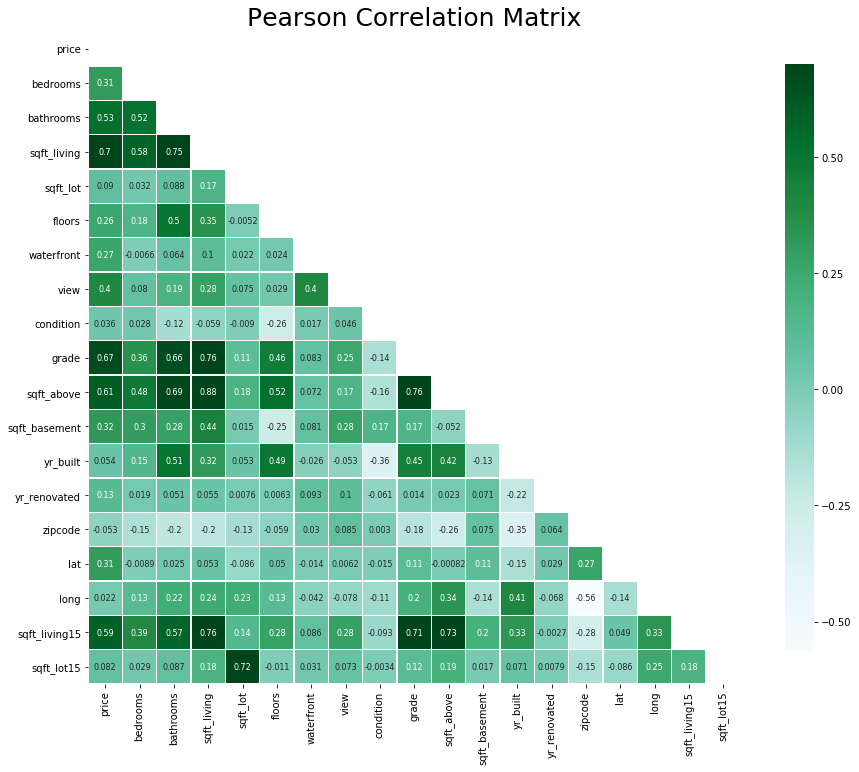

In [56]:
##透過畫圖檢視features 的Pearson相關矩陣
#發現sqft_living對於price的相關性最高
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

<Figure size 864x576 with 0 Axes>

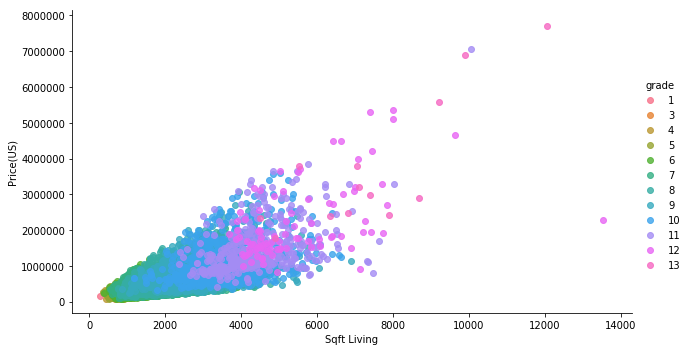

In [57]:
#畫圖檢視相關性(price & Sqft Living & grade)
plt.figure(figsize = (12,8))
g=sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df_usa, hue="grade", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")

plt.show()

C:\Users\Owen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


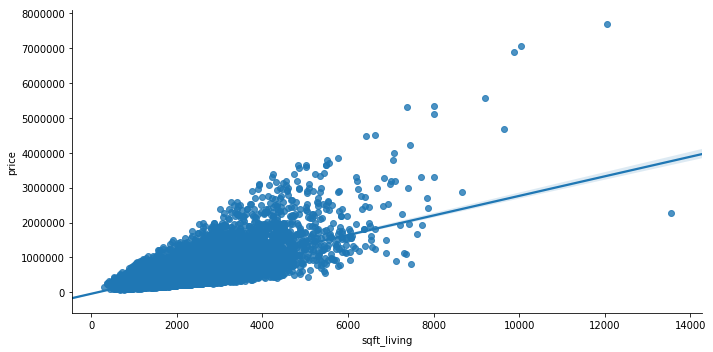

In [58]:
#畫圖檢視相關性(sqft_living & grade)
f1=sns.lmplot(x='sqft_living',y='price',aspect=2,data=df_usa)

C:\Users\Owen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


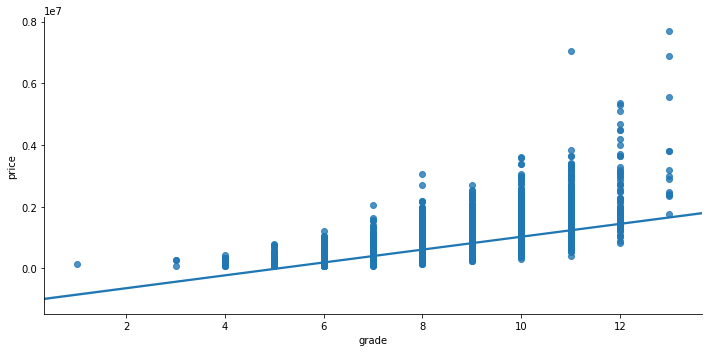

In [59]:
#畫圖檢視相關性(price & grade)
f1=sns.lmplot(x='grade',y='price',aspect=2,data=df_usa)

C:\Users\Owen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


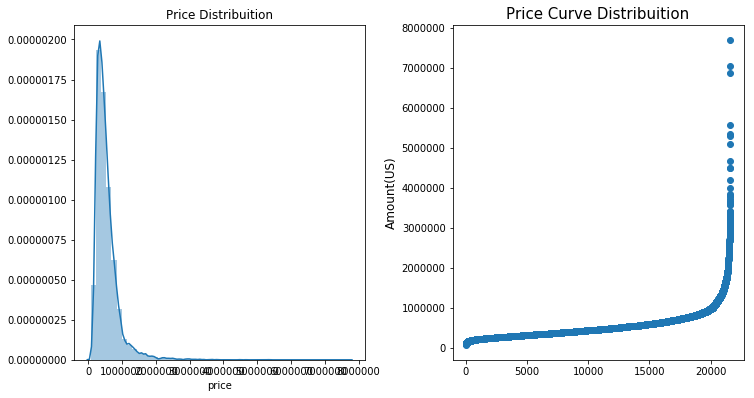

In [60]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df_usa['price'])

plt.subplot(122)
g1 = plt.scatter(range(df_usa.shape[0]), np.sort(df_usa.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [61]:
#透過熱圖檢視美國該州區域價格分佈
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df_usa.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

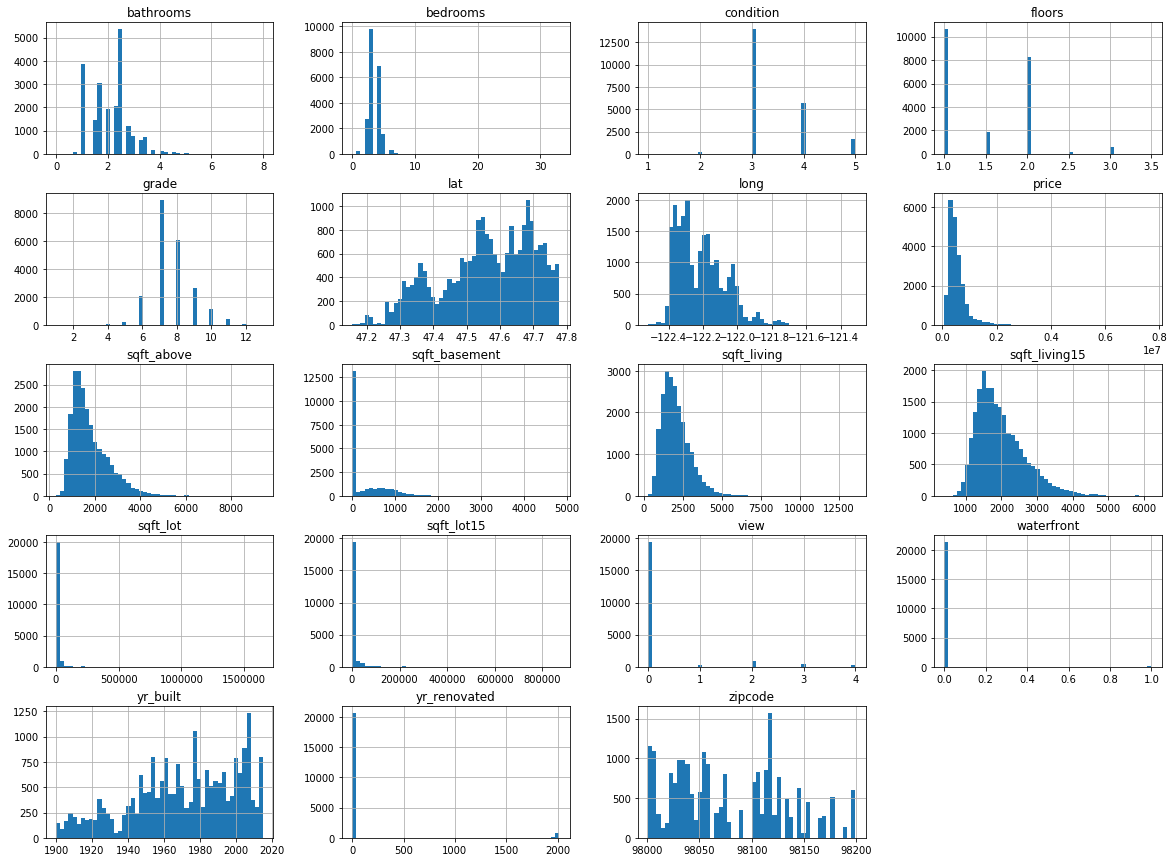

In [62]:
#畫散佈圖
%matplotlib inline
import matplotlib.pyplot as plt
df_usa_test2=df_usa.drop(['id', 'date'], axis=1, inplace=False)
df_usa_test2.hist(bins=50, figsize=(20,15))
plt.show()

# 開始建模
### Xgboost說明
https://mp.weixin.qq.com/s?__biz=MzA4ODUxNjUzMQ==&mid=2247485942&idx=1&sn=802e331b6457f63914f3fc4ff0b2f9a8&chksm=9029bb2aa75e323ce35eca2ec85f0426a42ad1a16ff61d168e1173869136787581422db1140b&token=1002129853&lang=zh_CN#rd

### LightGBM說明
https://zhuanlan.zhihu.com/p/149522630


In [63]:
#切分資料
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
df_usa2=df_usa.drop(['id', 'date'], axis=1, inplace=False)
X = df_usa2.drop("price",axis=1).values

#y = df_usa2["price"].apply(np.log1p)
y = df_usa2["price"].values
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [64]:
#對X_train標準化
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(X_train)
#X_train=sc.transform(X_train)
#print(X_train_std)

In [65]:
#對X_train標準化
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(X_test)
#X_test=sc.transform(X_test)
#print(X_train_std)

In [66]:
#引用模型套件
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [67]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
#from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [68]:
#引用模型套件
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import time

## 使用交叉驗證cross validation，挑出最佳的模型

In [69]:
#使用交叉驗證cross validation，挑出最佳的模型
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Linear Regression
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train, cv=3)
lin_reg_mean = lin_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsRegressor()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

#SVM

#svr_clf = SVR()
#svr_scores = cross_val_score(svr_clf, X_train, y_train, cv=3)
#svr_mean = svr_scores.mean()

#logistic Regressoion
#log_reg=LogisticRegression()
#log_scores=cross_val_score(log_reg,X_train,y_train,cv=3)
#log_reg_mean=cross_val_score()

# Gradient Boosting Classifier
grad_clf = GradientBoostingRegressor()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestRegressor(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeRegressor()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

#Xgboost Regressor
xgb_reg=xgb.XGBRegressor(random_state=13)
xgb_scores=cross_val_score(xgb_reg,X_train,y_train,cv=3)
xgb_mean=xgb_scores.mean()

#LightGBM
lgb_reg=lgb.LGBMRegressor(random_state=13)
lgb_scores=cross_val_score(lgb_reg,X_train,y_train,cv=3)
lgb_mean=lgb_scores.mean()
d = {'Regressors': ['Linear Regressor','KNN','Gradient Boosting','Decision Tree','Random Forest','Xgboost','LightGBM'], 
    'Crossval Mean Scores': [lin_reg_mean,knn_mean, grad_mean, tree_mean,rand_mean,xgb_mean,lgb_mean]}
#result_df = pd.DataFrame(data=d).reset_index()
result_df = pd.DataFrame(data=d)

[20:12:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## 發現LightGBM效果最佳

In [70]:
# 全部模型的表現
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Regressors,Crossval Mean Scores
6,LightGBM,0.88
2,Gradient Boosting,0.87
5,Xgboost,0.87
4,Random Forest,0.86
3,Decision Tree,0.74
0,Linear Regressor,0.70
1,KNN,0.48


## 建立模型評量指標 MAPE、Hit Rate

In [71]:
#建立MAPE的運算公式
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [72]:
#建立模型成效的報表
def report(y_true, y_pred):

    mape = mean_absolute_percentage_error(y_true, y_pred)
    print('mape:', mape)
    print("對於每個物件的預測價格誤差為", round(mape*100, 2), "%")

    error_abs = abs((y_true - y_pred) / y_true)

    hit10 = 0
    for i in error_abs:
        if i <= 0.1:
            hit10 += 1

    hit_rate_10 = hit10/len(error_abs)
    print('hitrate10:', hit_rate_10)
    print("每100個物件中，共有", round(hit_rate_10*100, 1) ,"個物件在預測誤差 10% 以內")

    hit20 = 0
    for i in error_abs:
        if i <= 0.2:
            hit20+=1

    hit_rate_20 = hit20/len(error_abs)
    print('hitrate20:', hit_rate_20)
    print("每100個物件中，共有", round(hit_rate_20*100, 1) ,"個物件在預測誤差 20% 以內")

In [73]:
#引用sklearn的線性回歸套件
from sklearn.linear_model import LinearRegression

# 設定模型與模型參數
lr = LinearRegression()

# 使用 Train 資料訓練模型
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
#得出模型成效
#將test data丟入上個步驟訓練好的模型得出預測結果
pred_y = lr.predict(X_test)
report(y_test, pred_y)

mape: 0.255190073351168
對於每個物件的預測價格誤差為 25.52 %
hitrate10: 0.29285218598195695
每100個物件中，共有 29.3 個物件在預測誤差 10% 以內
hitrate20: 0.5200092528336803
每100個物件中，共有 52.0 個物件在預測誤差 20% 以內


In [75]:
#重新命名套件名稱
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression

In [76]:
#建立決策樹模型
dt_regr = DecisionTreeRegressor(random_state=13)
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=13, splitter='best')

In [77]:
y_pred =  dt_regr .predict(X_test)
report(y_test, y_pred)

mape: 0.18945981560258954
對於每個物件的預測價格誤差為 18.95 %
hitrate10: 0.4122137404580153
每100個物件中，共有 41.2 個物件在預測誤差 10% 以內
hitrate20: 0.6689798750867453
每100個物件中，共有 66.9 個物件在預測誤差 20% 以內


In [78]:
#建立隨機森林模型
rf_regr = RandomForestRegressor(random_state=13)
rf_regr.fit(X_train, y_train)
rf_regr.score(X_test,y_test)

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8701994391522215

In [79]:
y_pred = rf_regr.predict(X_test)
report(y_test, y_pred)

mape: 0.13940694656377853
對於每個物件的預測價格誤差為 13.94 %
hitrate10: 0.5244043488318297
每100個物件中，共有 52.4 個物件在預測誤差 10% 以內
hitrate20: 0.7888040712468194
每100個物件中，共有 78.9 個物件在預測誤差 20% 以內


In [80]:
#建立gbm model
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(learning_rate = 0.1)
gbm.fit(X_train, y_train)
gbm.score(X_test,y_test)

0.8785322920801389

In [81]:
y_pred = gbm.predict(X_test)
report(y_test, y_pred)

mape: 0.15035236614790567
對於每個物件的預測價格誤差為 15.04 %
hitrate10: 0.47952810548230396
每100個物件中，共有 48.0 個物件在預測誤差 10% 以內
hitrate20: 0.7665972704140643
每100個物件中，共有 76.7 個物件在預測誤差 20% 以內


In [82]:
#建立Xgboost模型
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
xgb_regr = xgb.XGBRegressor(random_state=13)
xgb_regr.fit(X_train, y_train)
xgb_regr.score(X_test,y_test)

[20:12:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8787296352114251

In [83]:
y_pred = xgb_regr.predict(X_test)
report(y_test, y_pred)

mape: 0.15059078572099438
對於每個物件的預測價格誤差為 15.06 %
hitrate10: 0.4864677307425399
每100個物件中，共有 48.6 個物件在預測誤差 10% 以內
hitrate20: 0.7626648160999306
每100個物件中，共有 76.3 個物件在預測誤差 20% 以內


In [84]:
#建立lightgbm模型
import lightgbm as lgb
lgbm_regr = lgb.LGBMRegressor(random_state=13)
lgbm_regr.fit(X_train, y_train)
lgbm_regr.score(X_test,y_test)

0.9036328354801118

In [85]:
y_pred = lgbm_regr.predict(X_test)
report(y_test, y_pred)

mape: 0.1300678589310483
對於每個物件的預測價格誤差為 13.01 %
hitrate10: 0.5447605829285218
每100個物件中，共有 54.5 個物件在預測誤差 10% 以內
hitrate20: 0.8165625722877631
每100個物件中，共有 81.7 個物件在預測誤差 20% 以內


In [86]:
#建立SVM regressor模型
#from sklearn.svm import SVR
#clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#clf.fit(X_train, y_train)
#predict=clf.predict(X)
#clf.score(X, y)

In [87]:
#y_pred = clf.predict(X_test)
#report(y_test, y_pred)

In [88]:
#print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', lr.score(X_test,y_test))

In [89]:
#xgb.fit(X_train,y_train)

## 調整超參數_Xgboost，使用RandomizedSearchCV

In [90]:
#隨機搜尋(Randomized Search)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=30),
    }

xgb_regr = xgb.XGBRegressor(random_state=13)
rnd_search = RandomizedSearchCV(xgb_regr, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

[20:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=13,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000A552BE2588>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000A552BE2CC0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [91]:
# 顯示最佳的超參數組合,這邊最佳features只能有7個，對於解釋X因子不大方便
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [92]:
# 顯示最佳的估算器
rnd_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_features=7, min_child_weight=1, missing=None,
       n_estimators=180, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [93]:
param = rnd_search.best_params_

In [94]:
#雖然最佳估算器如上，但因為features數量最大只能7，故人工將features調為最大30
xgb_regr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_features=30, min_child_weight=1, missing=None,
       n_estimators=180, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)
xgb_regr.fit(X_train, y_train)
xgb_regr.score(X_test,y_test)

[20:12:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8900519153469421

In [95]:
y_pred = xgb_regr.predict(X_test)
report(y_test, y_pred)

mape: 0.14207451740326663
對於每個物件的預測價格誤差為 14.21 %
hitrate10: 0.5063613231552163
每100個物件中，共有 50.6 個物件在預測誤差 10% 以內
hitrate20: 0.7811704834605598
每100個物件中，共有 78.1 個物件在預測誤差 20% 以內


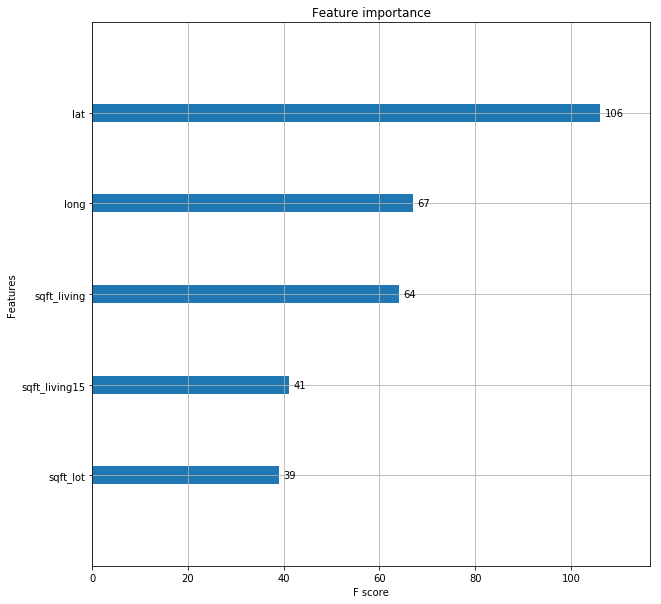

In [96]:
##透過xgboost畫出最佳5個參數
#先指定feature名字在陣列中，以利DMatrix可以正常讓plot顯示features名字
feature_names = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
xgbtrain = xgb.DMatrix(X_train, y_train,feature_names= feature_names)
#reg_cv = self.rnd_search(x_train, y_train)
#dtrain = xgb.DMatrix(Xtrain, label=ytrain, feature_names=feature_names)
#X_train_tran = pd.DataFrame(data=X_train, columns=feature_names)
model = xgb.train(dtrain=xgbtrain, params=param)
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(model, max_num_features=5, ax=ax)

## 調整LightGBM超參數，使用RandomizedSearchCV

In [97]:
#隨機搜尋(Randomized Search)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=30),
    }

lgbm_regr = lgb.LGBMRegressor(random_state=13)
rnd_search = RandomizedSearchCV(lgbm_regr, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=13, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000A5505779B0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000A550577748>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [98]:
# 顯示最佳的超參數組合,這邊最佳features只能有7個，對於解釋X因子不大方便
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [99]:
# 顯示最佳的估算器
rnd_search.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       max_features=7, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=180, n_jobs=-1, num_leaves=31,
       objective=None, random_state=13, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [100]:
param = rnd_search.best_params_

In [101]:
#雖然最佳估算器如上，但因為features數量最大只能7，故人工將features調為最大30
lgbm_regr = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       max_features=30, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=180, n_jobs=-1, num_leaves=31,
       objective=None, random_state=13, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)
lgbm_regr.fit(X_train, y_train)
lgbm_regr.score(X_test,y_test)

0.9057733386675104

In [102]:
y_pred = lgbm_regr.predict(X_test)
report(y_test, y_pred)

mape: 0.12674151505504394
對於每個物件的預測價格誤差為 12.67 %
hitrate10: 0.5614156835530881
每100個物件中，共有 56.1 個物件在預測誤差 10% 以內
hitrate20: 0.8204950266018969
每100個物件中，共有 82.0 個物件在預測誤差 20% 以內


In [103]:
params=rnd_search.best_params_

In [104]:
#透過RandomsearchCV 訓練Lightgbm模型，並找出最佳5個features
lgb_train = lgb.Dataset(X_train, y_train, feature_name=feature_names)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
evals_result = {} 

In [105]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                evals_result=evals_result,#非常重要的参数,一定要明确设置
                verbose_eval=10)

C:\Users\Owen\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


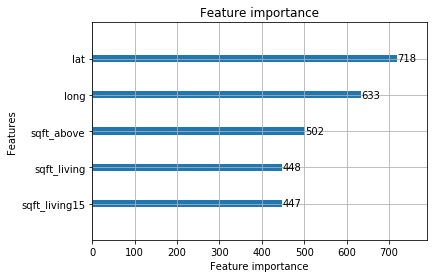

In [106]:
ax = lgb.plot_importance(gbm, max_num_features=5)#max_features表示最多展示出前5个重要性特征，可以自行设置
plt.show()

# 結果顯示 Lightgbm最佳